## Homogenous (stationary) Markov Chain Implementation in Edward

### Package Imports and Options

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import tensorflow as tf
import edward as ed
from edward.models import Bernoulli, Categorical, Normal

from utils.utils import load_dataframe, load_data_dic, preprocess

In [3]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', -1)

sns.set_style('whitegrid')

### Load Data

In [4]:
dic = load_data_dic()

Loading data dictionary...
Retrieved 153 fields


In [5]:
df_raw = load_dataframe()

Loading raw data from cache...
Fetching raw data from cache took 14.33 seconds
Retrieved 2,132,287 rows, 151 columns


In [6]:
# use these features to start
features = ['loan_status', 'annual_inc', 'avg_cur_bal', 'int_rate',
            'emp_length', 'funded_amnt', 'grade', 'home_ownership', 
            'loan_amnt', 'term', 'installment', 'verification_status', 
            'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 
            'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'sub_grade',
           'issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [7]:
# whenever we need to reset to raw df we can run this
df = df_raw[features].copy()

In [8]:
dic[dic['LoanStatNew'].isin(features)]

,LoanStatNew,Description
4,annual_inc,The self-reported annual income provided by the borrower during registration.
7,avg_cur_bal,Average current balance of all accounts
13,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
16,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
23,funded_amnt,The total amount committed to that loan at that point in time.
25,grade,LC assigned loan grade
26,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
32,inq_last_6mths,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
33,installment,The monthly payment owed by the borrower if the loan originates.


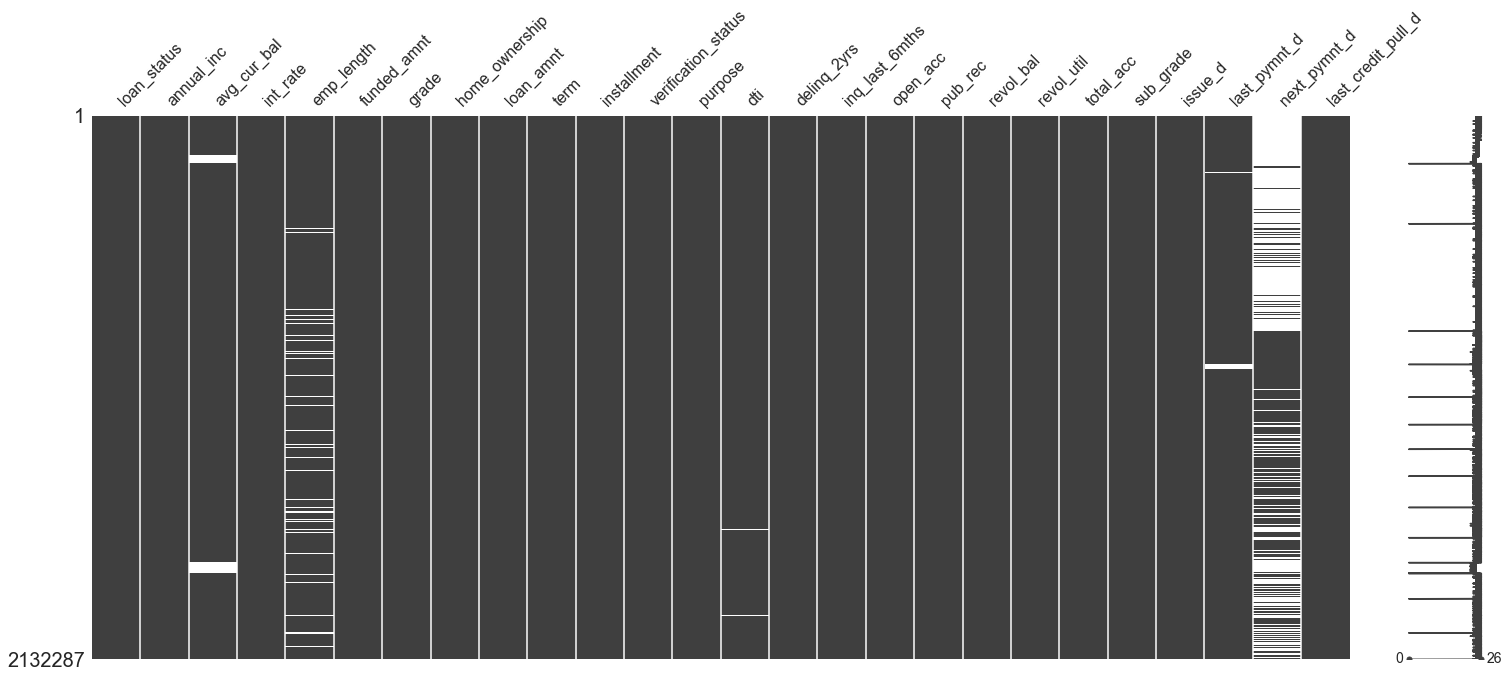

In [9]:
msno.matrix(df)

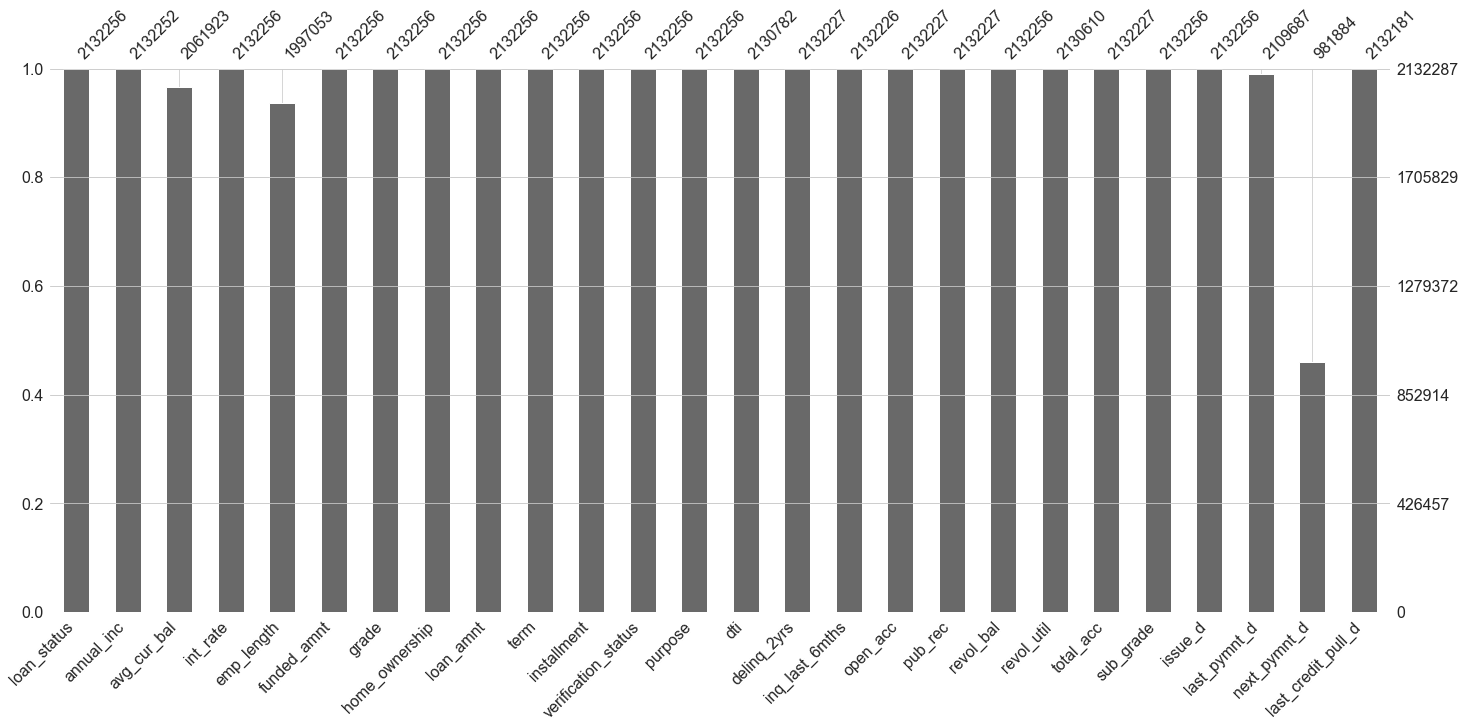

In [10]:
msno.bar(df)

### Preprocessing

In [11]:
df = preprocess(df)

Loading preprocessed data from cache...
Fetching preprocessed data took 1.50 seconds
Preprocessed 2,132,256 rows, 28 columns


In [12]:
df.loc[:, ['age_in_days', 'age_in_months']]

,age_in_days,age_in_months
0,1765 days,58
1,1765 days,58
2,1765 days,58
3,1765 days,58
4,1765 days,58
5,1765 days,58
6,1765 days,58
7,1765 days,58
8,1765 days,58
9,1765 days,58


In [13]:
df.dtypes

loan_status            object         
annual_inc             float64        
avg_cur_bal            float64        
int_rate               object         
emp_length             object         
funded_amnt            float64        
grade                  object         
home_ownership         object         
loan_amnt              float64        
term                   int64          
installment            float64        
verification_status    object         
purpose                object         
dti                    float64        
delinq_2yrs            float64        
inq_last_6mths         float64        
open_acc               float64        
pub_rec                float64        
revol_bal              float64        
revol_util             object         
total_acc              float64        
sub_grade              object         
issue_d                datetime64[ns] 
last_pymnt_d           object         
next_pymnt_d           object         
last_credit_pull_d     ob

In [14]:
# get currently active loans
df_active = df.loc[df.age_in_months < df.term]

In [15]:
# split loans by 36 and 60 month terms
df_36 = df.loc[df.term == 36]
df_60 = df.loc[df.term == 60]
df_36.shape[0] + df_60.shape[0] == df.shape[0]

True

In [16]:
# split active loans by 36 and 60 month terms
df_active_36 = df_36.loc[df_36.age_in_months < df_36.term]
df_active_60 = df_60.loc[df_60.age_in_months < df_60.term]
df_active_36.shape[0] + df_active_60.shape[0] == df_active.shape[0]

True

/Users/basilvetas/.local/share/virtualenvs/lending-club-analysis-iUojZaP3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


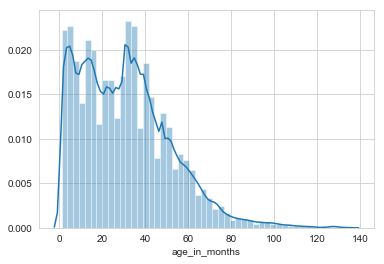

In [17]:
sns.distplot(df.age_in_months)

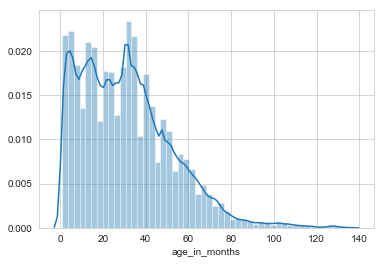

In [18]:
sns.distplot(df_36.age_in_months)

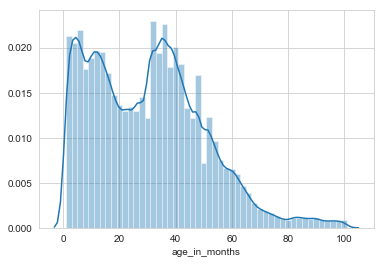

In [19]:
sns.distplot(df_60.age_in_months)

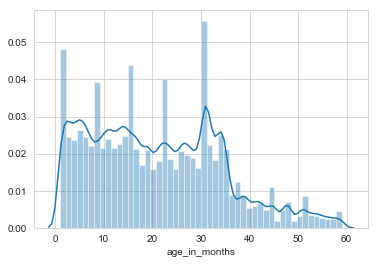

In [20]:
sns.distplot(df_active.age_in_months)

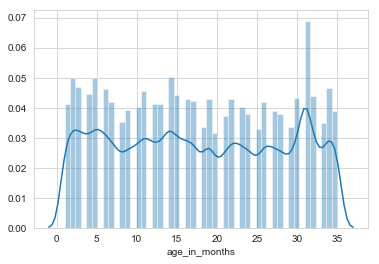

In [21]:
sns.distplot(df_active_36.age_in_months)

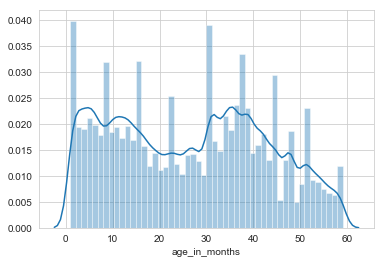

In [22]:
sns.distplot(df_active_60.age_in_months)

In [23]:
# TODO: we could try extracting months since last payment (q4_startdate - last_pymnt_d)
# resources
# http://www.utstat.toronto.edu/~rsalakhu/sta4273/notes/Lecture11.pdf
# https://github.com/blei-lab/edward/issues/450
# https://gist.github.com/fredcallaway/c7252b6326dfb502e70cad4146731aef
# https://discourse.edwardlib.org/t/a-simple-tensorflow-implementation-of-forward-backward/67
# https://gist.github.com/currymj/e903644c4e54e35fdb858c94f1631fe4

# https://discourse.edwardlib.org/t/any-tutorials-on-mcmc/179
# https://github.com/blei-lab/edward/blob/master/examples/bayesian_linear_regression.py 
# https://github.com/blei-lab/edward/blob/master/examples/rasch_model.py

In [24]:
# experimenting with: https://gist.github.com/fredcallaway/c7252b6326dfb502e70cad4146731aef
def categorical(ps):
    return Categorical(logits=ed.logit(ps)).value()

def flip(p):
    return tf.equal(Bernoulli(p=p), tf.constant(1))

def append(lst, x):
    return tf.concat(0, [lst, [x]])

class HMM(object):
    """A Hidden Markov Model."""

    def step(self, state):
        """Returns a new state following `state`."""
        raise NotImplementedError()

    def emit(self, state):
        """Returns an observable emission from `state`."""
        raise NotImplementedError()

    def init(self):
        """Returns an intial state."""
        raise NotImplementedError()

    def final(self, state):
        """Returns true if the model should stop in `state`."""
        raise NotImplementedError()
    
    def sample(self):
        def cond(states, emissions):
            s0 = states[-1]
            return self.final(s0) # TODO not final
        
        def body(states, emissions):
            s0 = states[-1]
            s1 = self.step(s0)
            e1 = self.emit(s1)
            return append(states, s1), append(emissions, e1)

        s0 = self.init()
        e0 = self.emit(s0)
        states = tf.convert_to_tensor([s0])
        emissions = tf.convert_to_tensor([e0])
        return tf.while_loop(
            cond, body, 
            loop_vars=[states, emissions],
            shape_invariants=[tf.TensorShape(None), tf.TensorShape(None)]
        )


class DiscreteGaussianHMM(HMM):
    """HMM with discrete transitions and gaussian emissions."""
    def __init__(self, P, mu, sigma, p_init, p_final):
        super().__init__()
        self.P = P
        self.mu = mu
        self.sigma = sigma
        self.p_init = p_init
        self.p_final = p_final

    def step(self, state):
        return categorical(self.P[state])

    def emit(self, state):
        return Normal(mu=self.mu[state], sigma=self.sigma[state]).value()

    def init(self):
        return categorical(self.p_init)

    def final(self, state):
        return flip(1 - tf.gather(self.p_final, state))
      

def demo():
    import matplotlib.pyplot as plt

    P = tf.constant(np.array([
        [.6, .4],
        [.2, .8],
    ], dtype='float32'))
    mu = tf.constant([5., -5.])
    sigma = tf.constant([1., 1.])
    model = DiscreteGaussianHMM(P, mu, sigma, [0.5, 0.5], [0.02, 0.02])

    sess = ed.get_session()
    emissions = [sess.run(model.sample()[1]) for _ in range(3)]
    for e in emissions:
        plt.plot(e)
    plt.show()